Import modules and functions

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

Import data and normalize it

In [7]:
dataset = pd.read_csv('bank.csv', sep = ';', header=0)
d = {

    'yes' : 1,
    'no' : 0
}

dataset['job'] = dataset['job'].map(d)
dataset['marital'] = dataset['marital'].map(d)
dataset['education'] = dataset['education'].map(d)
dataset['default'] = dataset['default'].map(d)
dataset['balance'] = dataset['balance'].map(d)
dataset['housing'] = dataset['housing'].map(d)
dataset['loan'] = dataset['loan'].map(d)
dataset['contact'] = dataset['contact'].map(d)
dataset['month'] = dataset['month'].map(d)
dataset['poutcome'] = dataset['poutcome'].map(d)
dataset['y'] = dataset['y'].map(d)

job = pd.get_dummies(dataset['job'])
marital = pd.get_dummies(dataset['marital'])
education = pd.get_dummies(dataset['education'])
contact = pd.get_dummies(dataset['contact'])
month = pd.get_dummies(dataset['month'])
poutcome = pd.get_dummies(dataset['poutcome'])

dataset['job']= dataset.join(job)
dataset['marital']= dataset.join(marital)
dataset['education']= dataset.join(education)
dataset['contact']= dataset.join(contact)
dataset['month']= dataset.join(month)
dataset['poutcome']= dataset.join(poutcome)

X = dataset[['age','default','housing','previous','campaign', 'loan','day','duration','pdays','education','job','marital','contact','month','poutcome']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

normalizer = preprocessing.Normalizer()
normalizer.fit(X_train)
X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)

Plot function

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Perceptron

In [11]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for mm in range(X_train.columns.size):
        for nn in range(X_train.columns.size):
            if nn > mm:
                ppn = Perceptron(max_iter=100, eta0=0.1, random_state=1)
                ppn.fit(X_train[[c[mm],c[nn]]], y_train)
                y_pred = ppn.predict(X_test[[c[mm],c[nn]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[mm],c[nn]]
                    xx1 = mm
                    xx2 = nn
    return [best_features, [xx1, xx2], best_score]

In [5]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['age', 'default'], [0, 1], 0.8850405305821666]


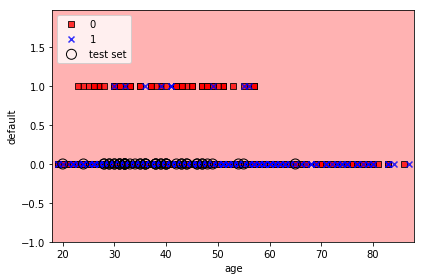

In [6]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    ppn = Perceptron(max_iter=100, eta0=0.1, random_state=1)
    ppn.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()
plot_best_feature(output, X_train, X_test, y_train, y_test)

Logit regression

In [7]:
from sklearn.linear_model import LogisticRegression

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for mm in range(X_train.columns.size):
        for nn in range(X_train.columns.size):
            if nn > mm:
                lr = LogisticRegression(C=100, random_state=1)
                lr.fit(X_train[[c[mm],c[nn]]], y_train)
                y_pred = lr.predict(X_test[[c[mm],c[nn]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[mm],c[nn]]
                    xx1 = mm
                    xx2 = nn
    return [best_features, [xx1, xx2], best_score]

In [8]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['housing', 'duration'], [2, 7], 0.8901989683124539]


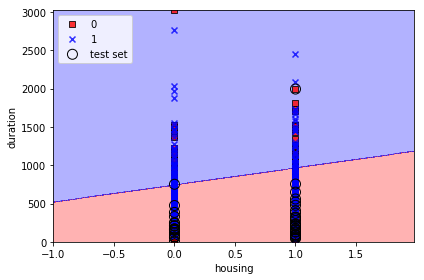

In [9]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    lr = LogisticRegression(C=100, random_state=2333)
    lr.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=lr, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()
plot_best_feature(output, X_train, X_test, y_train, y_test)

SVM

In [10]:
from sklearn.svm import SVC
def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for mm in range(X_train.columns.size):
        for nn in range(X_train.columns.size):
            if nn > mm:
                svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
                svm.fit(X_train[[c[mm],c[nn]]], y_train)
                y_pred = svm.predict(X_test[[c[mm],c[nn]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[mm],c[nn]]
                    xx1 = mm
                    xx2 = nn
    return [best_features, [xx1, xx2], best_score]


In [11]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['housing', 'pdays'], [2, 8], 0.8865143699336773]


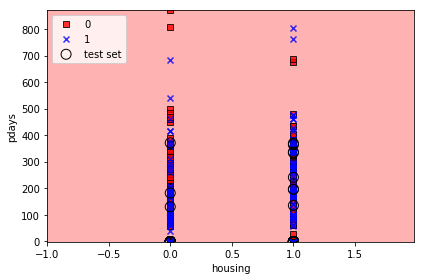

In [12]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    svm = SVC(kernel='linear', C=5.0, random_state=2333)
    svm.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=svm, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/ppn.png', dpi=300)
    plt.show()
plot_best_feature(output, X_train, X_test, y_train, y_test)

Decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for mm in range(X_train.columns.size):
        for nn in range(X_train.columns.size):
            if nn > mm:
                tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
                tree.fit(X_train[[c[mm],c[nn]]], y_train)
                y_pred = tree.predict(X_test[[c[mm],c[nn]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[mm],c[nn]]
                    xx1 = mm
                    xx2 = nn
    return [best_features, [xx1, xx2], best_score]

In [13]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['duration', 'pdays'], [7, 8], 0.8894620486366986]


In [14]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=2333)
    tree.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=tree, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

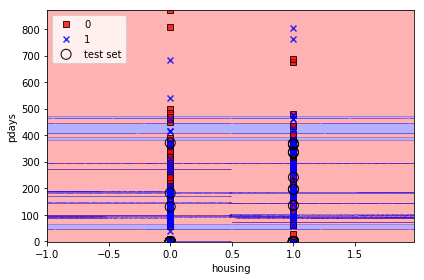

In [21]:
plot_best_feature(output, X_train, X_test, y_train, y_test)

KNN

In [17]:

from sklearn.neighbors import KNeighborsClassifier

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for mm in range(X_train.columns.size):
        for nn in range(X_train.columns.size):
            if nn > mm:
                knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
                knn.fit(X_train[[c[mm],c[nn]]], y_train)
                y_pred = knn.predict(X_test[[c[mm],c[nn]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[mm],c[nn]]
                    xx1 = mm
                    xx2 = nn
    return [best_features, [xx1, xx2], best_score]

In [18]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['housing', 'pdays'], [2, 8], 0.8909358879882093]


In [19]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
    knn.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=knn, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

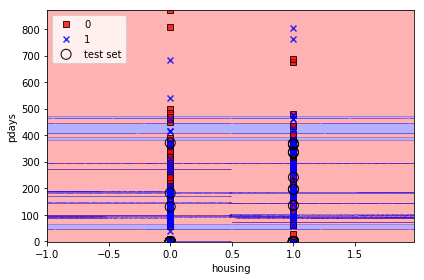

In [20]:
plot_best_feature(output, X_train, X_test, y_train, y_test)

Results of the best features:
Perceptron: age and default, accurancy score=0.885;
Logistic regression: housing and duration, accurancy score= 0.890;
SVM: hosuing and pdays, accurancy score=0.887;
Decision trees: duration and pdays, accurancy score=0.889;
KNN: housing and pdays, accurancy score=0.891;
The KNN method has the highest accurancy score so we choose housing and pdays as the best features.